In [53]:
# import statements
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd2

# Function Definitions

In [25]:
# define model
## note: p_EI could be included but it's just 1.
def SEIHRD_model(y, t, beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N):
    S, E, I, R, H, D = y
    dSdt = -S*I*beta(t)/N
    dEdt = S*I*beta(t)/N - E*r_EI(t)
    dIdt = E*r_EI(t) - I*r_IR(t)*p_IR(t) - I*r_IH(t)*p_IH(t)
    dHdt = I*r_IH(t)*p_IH(t) - H*r_HR(t)*p_HR(t) - H*r_HD(t)*p_HD(t)
    dRdt = I*r_IR(t)*p_IR(t) + H*r_HR(t)*p_HR(t)
    dDdt = H*r_HD(t)*p_HD(t)
    return dSdt, dEdt, dIdt, dHdt, dRdt, dDdt

#  plot SIDARTHE model
def plotSEIHRD(t, S, E, I, H, R, D):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'r', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'o', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, H, 'g', alpha=0.7, linewidth=2, label='Hospitalized')
    ax.plot(t, R, 'b', alpha=0.7, linewidth=2, label='Recovered')
    ax.plot(t, D, 'p', alpha=0.7, linewidth=2, label='Dead')


    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    plt.show();

# Example Simulation and Plot

/var/folders/fg/63k_244d5jg2d0hp2j_fb21w0000gp/T/ipykernel_89098/3539529373.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


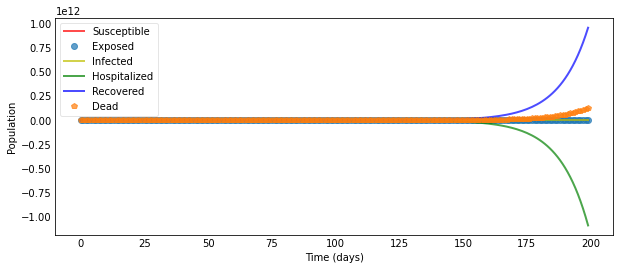

In [47]:
# set parameter values
def beta(t): return np.piecewise(t, [t>=0], [0.4])
def r_EI(t): return np.piecewise(t, [t>=0], [0.2])
def p_EI(t): return np.piecewise(t, [t>=0], [1]) ## not sure if this is necessary?? not in the model.
def r_IR(t): return np.piecewise(t, [t>=0], [0.07])
def p_IR(t): return np.piecewise(t, [t>=0], [0.8])
def r_IH(t): return np.piecewise(t, [t>=0], [0.1])
def p_IH(t): return np.piecewise(t, [t>=0], [0.2])
def r_HR(t): return np.piecewise(t, [t>=0], [0.1])
def p_HR(t): return np.piecewise(t, [t>=0], [0.88])
def r_HD(t): return np.piecewise(t, [t>=0], [0.1])
def p_HD(t): return np.piecewise(t, [t>=0], [0.12])
N = 19340000


# set initial conditions
N0 = N
I0 = 400 # fill in with data
D0 = 0 # fill in with data
R0 = 0 # fill in with data
H0 = 0 # fill in with data
E0 = I0/4 
S0 = N - E0 - I0 - R0 - H0 - D0
y0 = S0, E0, I0, H0, R0, D0 # Initial conditions vector

# set simulation parameters
## 
dt = 1
tstart = 0
tend = 200
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIHRD_model, y0, tvect, args=(beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N))
S, E, I, H, R, D = sim.T

# plot results
plotSEIHRD(tvect, S, E, I, H, R, D)

In [54]:
df = pd2.DataFrame(list(zip(S, E, I, H, R, D)), columns =['S', 'E', 'I', 'H', 'R', 'D'])
df

AttributeError: module 'pandas' has no attribute 'DataFrame'

In [45]:
print(I)

[4.00000000e+00 4.02721951e+00 4.27715392e+00 4.71031666e+00
 5.30717647e+00 6.06223245e+00 6.98031693e+00 8.07437837e+00
 9.36426097e+00 1.08761713e+01 1.26426359e+01 1.47028284e+01
 1.71031972e+01 1.98983545e+01 2.31522169e+01 2.69394002e+01
 3.13468866e+01 3.64759941e+01 4.24446871e+01 4.93902768e+01
 5.74725725e+01 6.68775533e+01 7.78216429e+01 9.05566883e+01
 1.05375752e+02 1.22619856e+02 1.42685824e+02 1.66035416e+02
 1.93205945e+02 2.24822646e+02 2.61613051e+02 3.04423727e+02
 3.54239752e+02 4.12207360e+02 4.79660309e+02 5.58150543e+02
 6.49483871e+02 7.55761474e+02 8.79428191e+02 1.02332869e+03
 1.19077281e+03 1.38561156e+03 1.61232548e+03 1.87612751e+03
 2.18308244e+03 2.54024596e+03 2.95582624e+03 3.43937174e+03
 4.00198954e+03 4.65659897e+03 5.41822629e+03 6.30434692e+03
 7.33528275e+03 8.53466324e+03 9.92996037e+03 1.15531088e+04
 1.34412245e+04 1.56374370e+04 1.81918522e+04 2.11626652e+04
 2.46174451e+04 2.86346168e+04 3.33051666e+04 3.87346019e+04
 4.50451990e+04 5.237857

In [44]:
print(H)

[ 4.00000000e-01  4.68353206e-01  5.14830391e-01  5.39740560e-01
  5.41389992e-01  5.16404426e-01  4.59871928e-01  3.65357291e-01
  2.24819169e-01  2.84480445e-02 -2.35565829e-01 -5.81331580e-01
 -1.02562569e+00 -1.58833403e+00 -2.29297631e+00 -3.16732399e+00
 -4.24412553e+00 -5.56195562e+00 -7.16620841e+00 -9.11025794e+00
 -1.14568133e+01 -1.42795010e+01 -1.76647107e+01 -2.17137495e+01
 -2.65453544e+01 -3.22986234e+01 -3.91364321e+01 -4.72494184e+01
 -5.68606279e+01 -6.82309280e+01 -8.16653192e+01 -9.75202897e+01
 -1.16212386e+02 -1.38228200e+02 -1.64136002e+02 -1.94599299e+02
 -2.30392622e+02 -2.72419922e+02 -3.21735990e+02 -3.79571413e+02
 -4.47361630e+02 -5.26780776e+02 -6.19781086e+02 -7.28638786e+02
 -8.56007522e+02 -1.00498057e+03 -1.17916326e+03 -1.38275731e+03
 -1.62065900e+03 -1.89857341e+03 -2.22314752e+03 -2.60212498e+03
 -3.04452645e+03 -3.56085930e+03 -4.16336186e+03 -4.86628756e+03
 -5.68623571e+03 -6.64253630e+03 -7.75769795e+03 -9.05792901e+03
 -1.05737439e+04 -1.23406

# Modification: 
### redefine beta to depend on mask compliance rate and mask effectiveness rate

In [ ]:
# set parameter values
def c_m(t): return np.piecewise(t, [t>=0], [0.4])
def epsilon_m(t): return np.piecewise(t, [t>=0], [0.4])
def beta(t): return np.piecewise(t, [t>=0], [0.4])
def r_EI(t): return np.piecewise(t, [t>=0], [0.2])
def p_EI(t): return np.piecewise(t, [t>=0], [1]) ## not sure if this is necessary?? not in the model.
def r_IR(t): return np.piecewise(t, [t>=0], [0.07])
def p_IR(t): return np.piecewise(t, [t>=0], [0.8])
def r_IH(t): return np.piecewise(t, [t>=0], [0.1])
def p_IH(t): return np.piecewise(t, [t>=0], [0.2])
def r_HR(t): return np.piecewise(t, [t>=0], [0.1])
def p_HR(t): return np.piecewise(t, [t>=0], [0.88])
def r_HD(t): return np.piecewise(t, [t>=0], [0.1])
def p_HD(t): return np.piecewise(t, [t>=0], [0.12])
N = 19340000


# set initial conditions
N0 = N
I0 = 4 # fill in with data
D0 = 0 # fill in with data
R0 = 0 # fill in with data
H0 = I0/10 # fill in with data
E0 = I0/4 
S0 = N - E0 - I0 - R0 - H0 - D0
y0 = S0, E0, I0, H0, R0, D0 # Initial conditions vector

# set simulation parameters
## 
dt = .5
tstart = 0
tend = 200
tvect = np.arange(tstart, tend, dt) 

# solve odes
sim = odeint(SEIHRD_model, y0, tvect, args=(beta, r_EI, p_EI, r_IR, p_IR, r_IH, p_IH, r_HR, p_HR, r_HD, p_HD, N))
S, E, I, H, R, D = sim.T

# plot results
plotSEIHRD(tvect, S, E, I, H, R, D)

In [40]:
# ## derivatives
# ## finite difference second derivative: [f(x+h)+f(x-h)-2f(x)]/h^2

# def first_derivative(var, timestep):
#     return [(var[i+1]-var[i])/(timestep) for i in range(len(var)-1)]

# def second_derivative(var, timestep):
#     return [(var[i+1]+var[i-1]-2*var[i])/(timestep**2) for i in range(len(var)-1)]




In [38]:
# variable_list = [S,I,D,A,R,T,H,E]

# for var in variable_list:
#     firstderivative = first_derivative(var, dt)
#     secondderivative = second_derivative(var, dt)
#     print([d > 0 for d in secondderivative])
#     print('')

In [39]:
# print([d > 0 for d in first_derivative(S,dt)])

In [41]:
### manual computation example
# S_first_derivative = [(S[i+1]-S[i])/(dt) for i in range(len(S)-1)]
# print(max(np.abs(S_first_derivative)))
# print(min(S_first_derivative),max(S_first_derivative))

# S_second_derivative = [(S[i+1]+S[i-1]-2*S[i])/(dt)**2 for i in range(len(S)-1)]
# print(max(np.abs(S_second_derivative)))
# print(min(S_second_derivative),max(S_second_derivative))
